<a href="https://colab.research.google.com/github/loyoladesa/experimental/blob/main/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regressão Linear

## Importação das Bibliotecas

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics

import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## data_txt

### Preparação


In [ ]:
# Input file containing data
input_file = '/content/drive/MyDrive/Seagate/Dataset/data_singlevar_regr.txt'

In [ ]:
# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [ ]:
data

array([[-0.86,  4.38],
       [ 2.58,  6.97],
       [ 4.17,  7.01],
       [ 2.6 ,  5.44],
       [ 5.13,  6.45],
       [ 3.23,  5.49],
       [-0.26,  4.25],
       [ 2.76,  5.94],
       [ 0.47,  4.8 ],
       [-3.9 ,  2.7 ],
       [ 0.27,  3.26],
       [ 2.88,  6.48],
       [-0.54,  4.08],
       [-4.39,  0.09],
       [-1.12,  2.74],
       [ 2.09,  5.8 ],
       [-5.78,  0.16],
       [ 1.77,  4.97],
       [-7.91, -2.26],
       [ 4.86,  5.75],
       [-2.17,  3.33],
       [ 1.38,  5.26],
       [ 0.54,  4.43],
       [ 3.12,  6.6 ],
       [-2.19,  3.77],
       [-0.33,  2.4 ],
       [-1.21,  2.98],
       [-4.52,  0.29],
       [-0.46,  2.47],
       [-1.13,  4.08],
       [ 4.61,  8.97],
       [ 0.31,  3.94],
       [ 0.25,  3.46],
       [-2.67,  2.46],
       [-4.66,  1.14],
       [-0.2 ,  4.31],
       [-0.52,  1.97],
       [ 1.24,  4.83],
       [-2.53,  3.12],
       [-0.34,  4.97],
       [ 5.74,  8.65],
       [-0.34,  3.59],
       [ 0.99,  3.66],
       [ 5.

In [ ]:
data.shape


(60, 2)

In [ ]:
X.shape

(60, 1)

In [ ]:
y.shape

(60,)

In [ ]:
# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
# Training data
X_train, y_train = X[:num_training], y[:num_training]
# Test data
X_test, y_test = X[num_training:], y[num_training:]

In [ ]:
X_train.shape

(48, 1)

In [ ]:
y_train.shape

(48,)

### Criando o Regressor

In [ ]:
# Create linear regressor object
regressor = LinearRegression()
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the output
y_test_pred = regressor.predict(X_test)

### Graficos

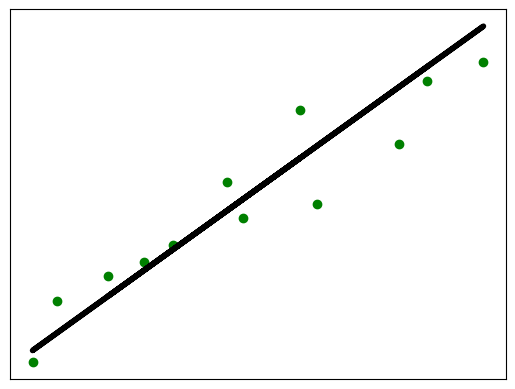

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

### Resultados

In [ ]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test,
y_test_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test,
y_test_pred), 2))
print("Median absolute error =", round(metrics.median_absolute_error(y_test,
y_test_pred), 2))
print("Explain variance score =", round(metrics.explained_variance_score(y_test,
y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86
R2 score = 0.86


## Insurance

### Preparação

In [ ]:
#Importando os dados
url_insurance = '/content/drive/MyDrive/Seagate/Dataset/insurance.csv'

# Carrega os dados em um DataFrame
df_insurance = pd.read_csv(url_insurance)
df_insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df_insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
le = LabelEncoder()
df_insurance['sex'] = le.fit_transform(df_insurance['sex'])
df_insurance['smoker'] = le.fit_transform(df_insurance['smoker'])
df_insurance['region'] = le.fit_transform(df_insurance['region'])
df_insurance.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [ ]:
df_insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df_insurance.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


In [ ]:
#Tabela de correlação
corr = df_insurance.corr()
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


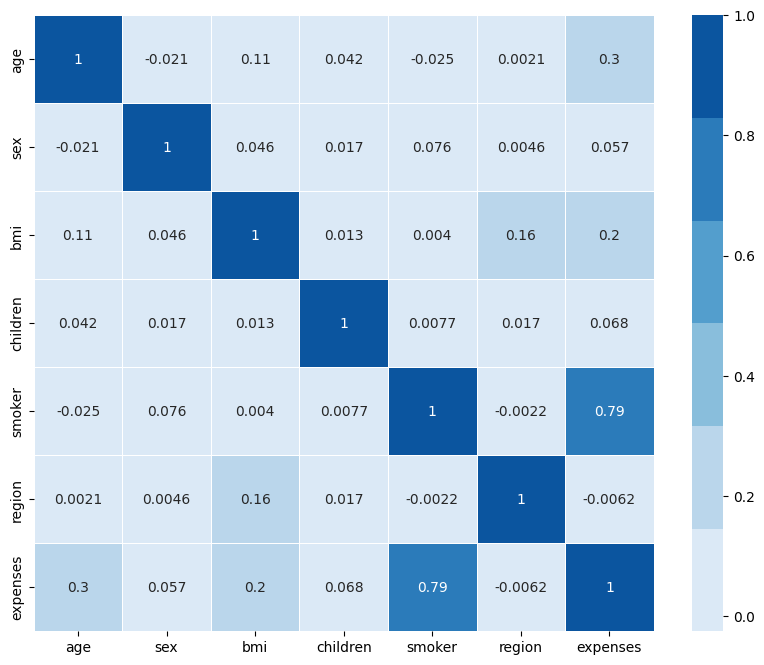

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

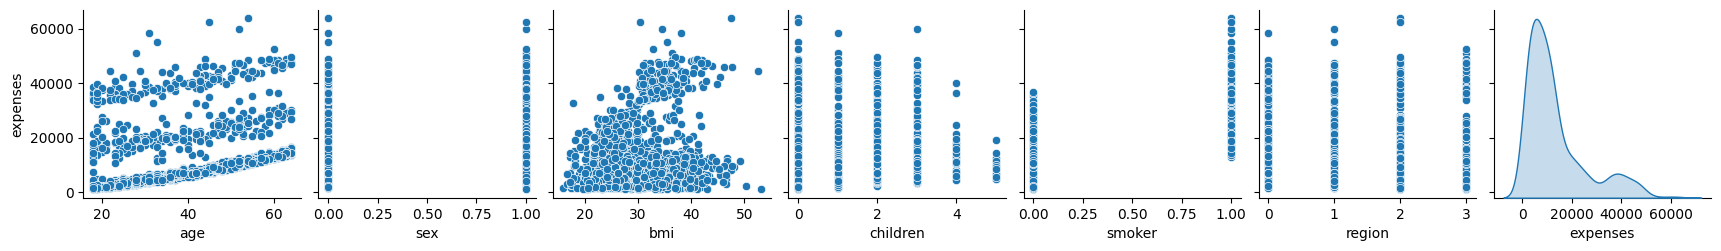

In [ ]:
# Exibe apenas a relação entre mpg e as outras variáveis
sns.pairplot(df_insurance, diag_kind='kde', y_vars=['expenses'])

In [ ]:
#x = df_insurance.drop(['expenses'], axis = 1)
x = df_insurance.drop(['age','sex','bmi','children','region','expenses'], axis = 1)
y = df_insurance.expenses

### Separa Dados de Treino e de Teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Cria o Regressor

In [ ]:
#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

### Resultados

In [ ]:
# Predict the output
y_test_pred = lr.predict(x_test)

In [ ]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test,
y_test_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test,
y_test_pred), 2))
print("Median absolute error =", round(metrics.median_absolute_error(y_test,
y_test_pred), 2))
print("Explain variance score =", round(metrics.explained_variance_score(y_test,
y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 5510.91
Mean squared error = 51967187.89
Median absolute error = 4264.96
Explain variance score = 0.67
R2 score = 0.67
R2 score = 0.67


### Graficos

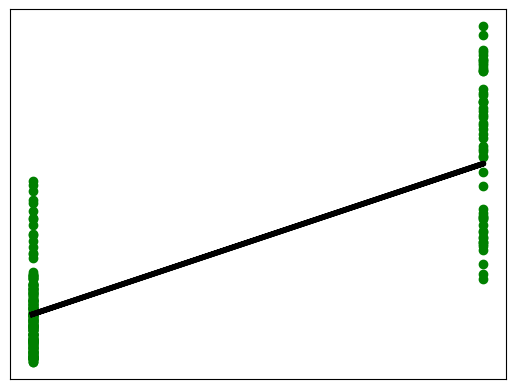

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

## Auto_CSV

In [ ]:
# Local do dataset online
url_dataset = 'https://raw.githubusercontent.com/lopes-andre/datasets/main/auto-mpg.csv'

# Carrega os dados em um DataFrame
cdata = pd.read_csv(url_dataset)
cdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Verifica o shape dos dados
print(f'Shape dos dados: {cdata.shape}\n')

print(f'Esta base de dados tem {cdata.shape[0]} linhas e {cdata.shape[1]} colunas.')


Shape dos dados: (398, 9)

Esta base de dados tem 398 linhas e 9 colunas.


In [ ]:
# Resumo Estatístico dos dados
cdata.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
le = LabelEncoder()
cdata['origin'] = le.fit_transform(cdata['origin'])
cdata['car name'] = le.fit_transform(cdata['car name'])
cdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,0,49
1,15.0,8,350.0,165,3693,11.5,70,0,36
2,18.0,8,318.0,150,3436,11.0,70,0,231
3,16.0,8,304.0,150,3433,12.0,70,0,14
4,17.0,8,302.0,140,3449,10.5,70,0,161


In [ ]:
cdata.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.572864,148.550251
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,89.495880
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,65.250000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,0.000000,150.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,225.750000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,2.000000,304.000000


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [ ]:

# Cria um filtro com True onde a entrada é um dígito
# e False onde não é um dígito
hp_is_digit = cdata['horsepower'].str.isdigit()

In [ ]:

# Imprime as entradas onde isdigit=False
cdata.loc[hp_is_digit == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,0,156
126,21.0,6,200.0,?,2875,17.0,74,0,150
330,40.9,4,85.0,?,1835,17.3,80,1,257
336,23.6,4,140.0,?,2905,14.3,80,0,152
354,34.5,4,100.0,?,2320,15.8,81,1,255
374,23.0,4,151.0,?,3035,20.5,82,0,5


In [ ]:
# Substitui '?' por np.NaN
cdata = cdata.replace('?', np.nan)
cdata.loc[hp_is_digit == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,0,156
126,21.0,6,200.0,NaN,2875,17.0,74,0,150
330,40.9,4,85.0,NaN,1835,17.3,80,1,257
336,23.6,4,140.0,NaN,2905,14.3,80,0,152
354,34.5,4,100.0,NaN,2320,15.8,81,1,255
374,23.0,4,151.0,NaN,3035,20.5,82,0,5


In [ ]:

# Converte a coluna `horsepower` do tipo objeto para o tipo float
cdata['horsepower'] = cdata['horsepower'].astype(float)
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [ ]:

# Substitui os valores faltantes com a Mediana da coluna
cdata['horsepower'] = cdata['horsepower'].fillna(cdata['horsepower'].median())
#cdata.dropna()


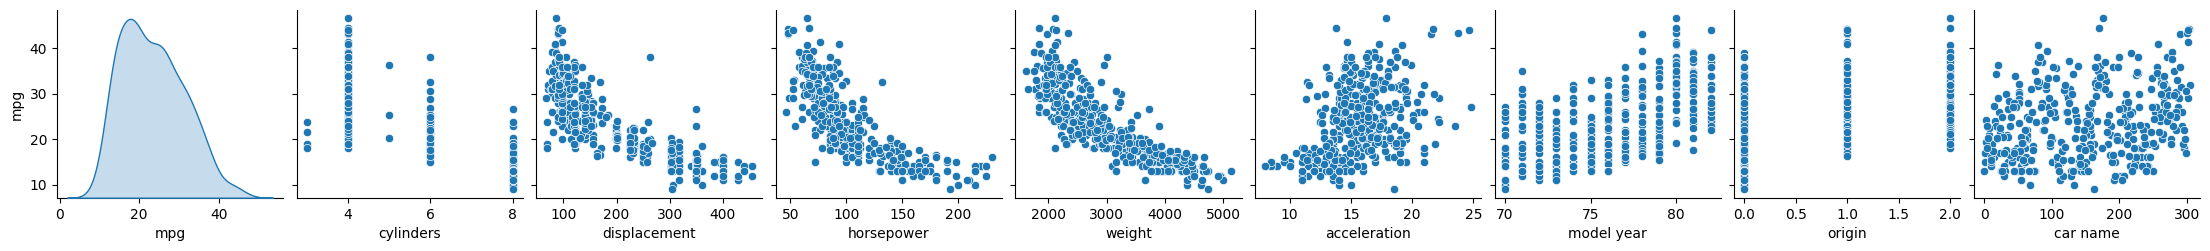

In [ ]:
# Exibe apenas a relação entre mpg e as outras variáveis
sns.pairplot(cdata, diag_kind='kde', y_vars=['mpg'])

In [ ]:
# Variáveis independentes (características)
X = cdata.drop(['mpg'], axis=1)

# Variável dependente (alvo)
y = cdata['mpg']

In [ ]:
# Divisão dos dados em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predict the output
y_test_pred = lr.predict(x_test)

In [ ]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test,
y_test_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test,
y_test_pred), 2))
print("Median absolute error =", round(metrics.median_absolute_error(y_test,
y_test_pred), 2))
print("Explain variance score =", round(metrics.explained_variance_score(y_test,
y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 2.3
Mean squared error = 8.82
Median absolute error = 1.84
Explain variance score = 0.85
R2 score = 0.85
R2 score = 0.85


### Case 1

In [ ]:
cdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [ ]:
# Variáveis independentes (características)
X = cdata.drop(['cylinders','displacement','weight','acceleration','model year','origin','car name','mpg'], axis=1)

# Variável dependente (alvo)
y = cdata['mpg']

In [ ]:
# Divisão dos dados em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predict the output
y_test_pred = lr.predict(x_test)

In [ ]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test,
y_test_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test,
y_test_pred), 2))
print("Median absolute error =", round(metrics.median_absolute_error(y_test,
y_test_pred), 2))
print("Explain variance score =", round(metrics.explained_variance_score(y_test,
y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 3.74
Mean squared error = 22.05
Median absolute error = 2.9
Explain variance score = 0.62
R2 score = 0.62
R2 score = 0.62


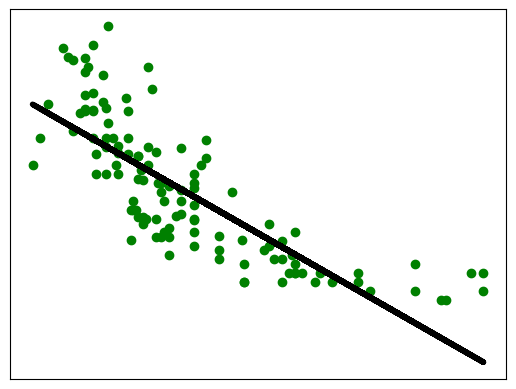

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()